In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
data = pd.read_csv(r"C:\Users\vedan\Downloads\linear_regression_dataset.csv")

In [133]:
data

,AGE,FEMALE,LOS,RACE,APRDRG,TOTCHG
0,17,1,2,1.0,560,2660
1,17,0,2,1.0,753,1689
2,17,1,7,1.0,930,20060
3,17,1,1,1.0,758,736
4,17,1,1,1.0,754,1194
...,...,...,...,...,...,...
495,0,1,6,1.0,636,5881
496,0,1,2,1.0,640,1171
497,0,1,2,1.0,640,1171
498,0,1,2,1.0,640,1086


In [134]:
data.fillna(data.mean(), inplace=True)
data["APRDRG"]/=100
data["AGE"]/=10
data["LOS"]/=10
data["TOTCHG"]/=10000
print(data)
train_data=data.values
y =train_data[:,-1].reshape(train_data.shape[0],1)
x=train_data[:,:-1]
x=np.vstack((np.ones((x.shape[0],)),x.T)).T

     AGE  FEMALE  LOS  RACE  APRDRG  TOTCHG
0    1.7       1  0.2   1.0    5.60  0.2660
1    1.7       0  0.2   1.0    7.53  0.1689
2    1.7       1  0.7   1.0    9.30  2.0060
3    1.7       1  0.1   1.0    7.58  0.0736
4    1.7       1  0.1   1.0    7.54  0.1194
..   ...     ...  ...   ...     ...     ...
495  0.0       1  0.6   1.0    6.36  0.5881
496  0.0       1  0.2   1.0    6.40  0.1171
497  0.0       1  0.2   1.0    6.40  0.1171
498  0.0       1  0.2   1.0    6.40  0.1086
499  0.0       0  0.4   1.0    6.40  0.4931

[500 rows x 6 columns]


In [152]:
def model(x,y,rate,iteration):
    m=y.size
    theta=np.zeros((6,1))
    global cost_list
    cost_list=[]
    for i in range(iteration):
        y_pred=np.dot(x,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-y))
        d_theta=(1/m)*np.dot(x.T,y_pred-y)
        theta=theta-rate*d_theta
        cost_list.append(cost)
        if(i%(iteration/10)==0):
            print(cost)
    return theta,cost_list[0]



In [158]:
print(model(x,y,0.01,100000))

0.11393350599999999
0.03366988179152898
0.033669689408898626
0.03366968939614461
0.03366968939614378
0.03366968939614377
0.033669689396143766
0.033669689396143766
0.033669689396143766
0.033669689396143766
(array([[ 0.52187633],
       [ 0.13467772],
       [-0.03904095],
       [ 0.74313982],
       [-0.02124165],
       [-0.07790963]]), 0.11393350599999999)


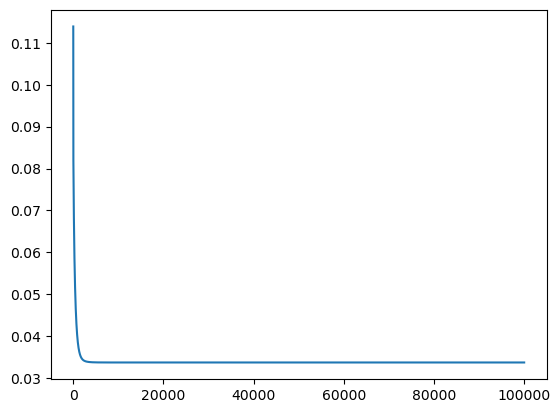

In [159]:
rng=np.arange(0,100000)
plt.plot(rng,cost_list)
plt.show()